In [1]:
from load_modules import * 

In [2]:
file_location = "../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/"


filenames = glob.glob(file_location+'/[!Wave|metadata]*.txt')

data = load_files([filenames], True)


start loading data, number of files 51
opening file 1 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Liver_map_150z25_60s_#12.txt
loaded  file 1 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Liver_map_150z25_60s_#12.txt
opening file 2 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Muscle_map_150z25_60s_#34.txt
loaded  file 2 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Muscle_map_150z25_60s_#34.txt
opening file 3 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#45.txt
loaded  file 3 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#45.txt
opening file 4 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#43.txt
loaded  file 4 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#43.txt
opening file 5 of 51: ../../data/Raman_Mous

loaded  file 36 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Liver_map_150z25_60s_#17.txt
opening file 37 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Liver_map_150x25_60s_#7.txt
loaded  file 37 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Liver_map_150x25_60s_#7.txt
opening file 38 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#50.txt
loaded  file 38 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#50.txt
opening file 39 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#44.txt
loaded  file 39 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Kidney_map_150z25_60s_#44.txt
opening file 40 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/Liver_map_150x25_60s_#10.txt
loaded  file 40 of 51: ../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08

In [3]:
img, wavenumbers = data[0][0], data[1][0]

In [16]:
LS = LSQ.photo_approximation(wavenumbers, size=img.shape[-1])

raw = img[3,15]
photo = LS(img[3,15])
w = np.ones(len(raw))
w[photo > raw] += 1
w /= np.mean(w)
new_raw = copy.copy(raw)
new_raw[photo > raw] *= 0.975

update = LS(new_raw, w)

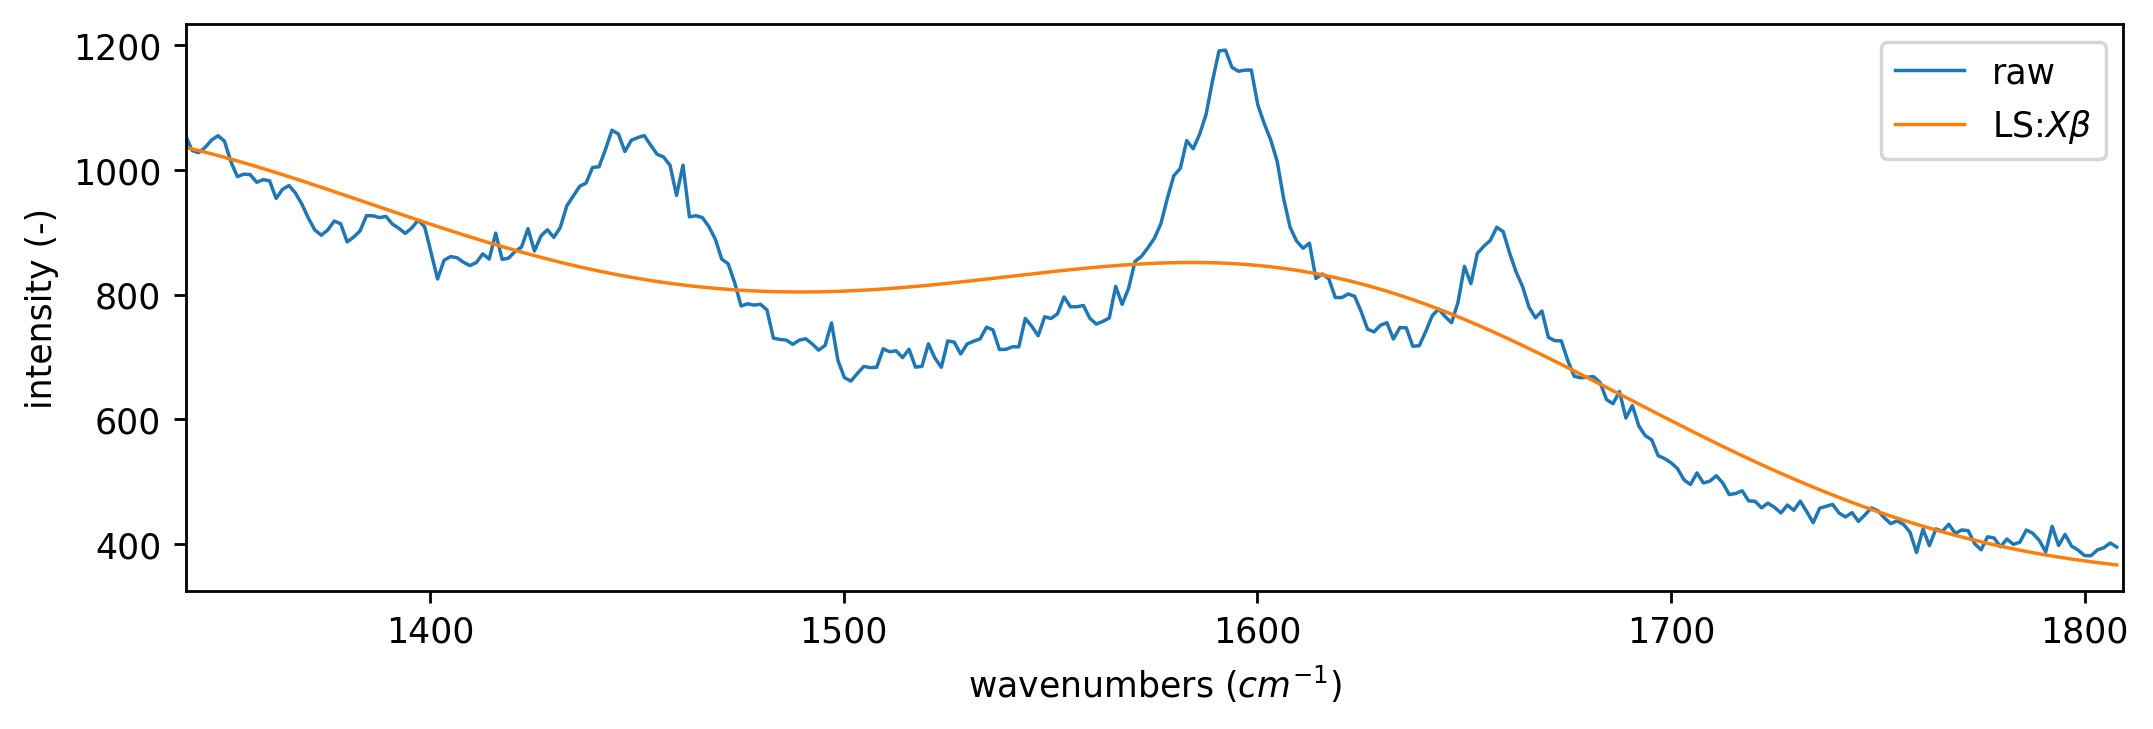

In [17]:
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 1

# plt.plot(wavenumbers, new_raw, label="raw")
L,R = 800,1100
plt.plot(wavenumbers[L:R], raw[L:R], label="raw")
plt.plot(wavenumbers[L:R], photo[L:R], label=r"LS:$X\beta$")
# plt.plot(wavenumbers[L:R], update[0][L:R], label=r"WLST:$X\beta$")
plt.xlim(wavenumbers[L], wavenumbers[R])
plt.legend()
plt.xlabel(r"wavenumbers ($cm^{-1}$)")
plt.ylabel("intensity (-)")
plt.show()